# Intro to the Normal Distribution and fitting linear data using Python

This is a "jupyter notebook". It's a web based computational tool used by studnets and professionals alike to enable both exporatory data analysis as well as communication and documentation of what I call "computational narratives". Each project in this course will require a report in the form of a "laboratory narrative" including the physical system you investigated, the circuits and instrumentation you used to collect the data along with any statistical or mathematical analysis you performed.

The so called "Normal" (or Gaussian) distribution is a great model for many actual distributions in real life. There is an underlying mathematical reason for this (we'll learn later, called the "central limit theorem"), but for now it's important to simply get a handle on the concept. You've probably seen or at least heard of a normal distribution before (also sometimes called a "bell curve"). In the cells below we'll use python to a) explore the properties of normal distributions and b) learn some of the python libraries that are useful for managing, manipulating and visualizing data.

The cell immediately following this one has the code:

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as pl
    from scipy.optimize import curve_fit
    from scipy.stats import gaussian_kde

    %matplotlib inline
    
    print("You did it!")

If you put the cursor into this cell, hold the "shift key" and type "enter" you will "execute" this cell. Afterwards you should see the words "You did it!" appear in the output space below the cell. The code in this cell imports three important libraries (pandas, numpy and matplotlib) and two functions (curve_fit and gaussian_kde) that we'll be using in this example notebook. It also tells the graphing library (matplotlib) to include the graphs it creates within the notebook itself. Each week we may be using different libraries and functions to perform the analysis we need. You can learn more about these on the corresponding websites ([pandas](https://pandas.pydata.org), [numpy](http://www.numpy.org), [matplotlib](https://matplotlib.org), [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html), [guassian_kde](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.gaussian_kde.html)).

Each cell of the notebook can contain either text (really [markdown](https://en.wikipedia.org/wiki/Markdown)) including figures and equations) or code ([python](https://www.python.org) in our case). You can tell which type of cell by the pop-up below the main menu, which will show "markdown" or "code".

Finally there's a great reference text on statistics that uses python. It's Allen B. Downey's ["Think Stats"](http://greenteapress.com/wp/think-stats-2e/) book. We're not going to use a lot from this text, particularly not the *software*, but the description and explainations are quite good. The software is also good, but I'd rather have you learn how to use the standard python libraries than the simplified versions used in this text. The text is freely available on the greentree press web site as a pdf, but you can get a paper version from [amazon.com](http://www.amazon.com/gp/product/1491907339/ref=as_li_tl?ie=UTF8&camp=1789&creative=9325&creativeASIN=1491907339&linkCode=as2&tag=greenteapre01-20&linkId=O7WYM6H6YBYUFNWU).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from scipy.optimize import curve_fit
from scipy.stats import gaussian_kde

%matplotlib inline

print("You did it!")

You did it!


# Getting Help on anything

You can also get help on anything (literally!) by entering the name of the thing into a code cell followed by a question mark "?". When you "exectute" the cell, you'll get documetnation about the "thing" (if it exists) for free! Try it.

In [2]:
curve_fit?

# Getting numbers that have a certain distribution

Built into the numpy library are a large collection of random number generators that produce collections of random numbers. Below is an example of pulling 1000 random numbers from a normal distribution with a mean of $\mu=3.0$ and a standard deviation of $\sigma=0.5$. See how easy it is! We use the 'matplotlib' function 'plot' to create a simple histogram of the generated numbers.

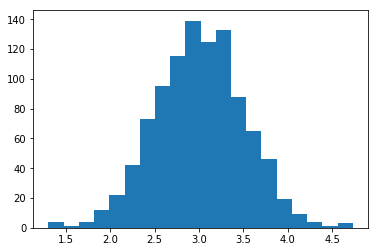

In [3]:
mu = 3.0
std = 0.5
N=1000

xs = np.random.normal(loc=mu, scale=std, size=N)

res=pl.hist(xs,bins=20)

# Getting answers without calculus

You can use calculus to define what a distribution means very precisely like so:

$$ P(x) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

Where $P(x)$ is the probability *density* of measuring $x$ given that it comes from a normal distribution with a mean $\mu$ and a standard deviation of $\sigma$. In other words if $x$ is a distance, measured in meters, it would be the probability *per* *meter* of measuring a particular value for $x$. In order to actually calcuate a real probability we need to *integrate* $P(x)$ over the domain of $x$ we're interested in. Of course this requires calculus if we want to do it analytically. This is sometimes difficult, and other times it's impossible! However, we can also carry out this kind of analysis numerically, which will be our general approach in this class. How? Let's try it!

Suppose we know $x$ comes from a distribution with a mean of $\mu=3$ and a standard deviation of $\sigma=0.5$ (as the above graph demonstrates). How can we answer the question: "What's the chance of having $x>4$"? Easy! We simply *count* the number of $x$s whose value is greater than four and divide by the total number we "measured".

In [14]:
#
# though the spelling is a bit arcane, it's easy to *do*
#
# here we print the values of x from the array of N elemeents whose value is greater than 4
#

print(xs[xs>4])

#
# It turns out there are only a handful (compared to N)
#

print(len(xs[xs>4]))

#
# What's the probability?
#

print("Probability x>4 = ", len(xs[xs>4])/N)

print("Probability x<2 = ", len(xs[xs<2])/N)

print("Probability x>4 or x<2 =", len(xs[xs>4])/N + len(xs[xs<2])/N)

[ 4.09807484  4.05547064  4.38738458  4.26497275  4.04862335  4.05500125
  4.10202209  4.01710536  4.11575706  4.63490676  4.31446958  4.73422321
  4.01988576  4.16216614  4.41745854  4.13725303  4.03499665  4.04049375
  4.31827207  4.01150891  4.18890164  4.04402757  4.62478352]
23
Probability x>4 =  0.023
Probability x<2 =  0.021
Probability x>4 or x<2 = 0.044


# Normal plots

One easy way to visualize the "normality" of a set of data is to make a ["Normal Plot"](https://en.wikipedia.org/wiki/Normal_probability_plot). These are described nicely in [Downey's](http://greenteapress.com/thinkstats2/html/thinkstats2006.html#sec51) book. The recipe he describes is carried out below using standard library functions.

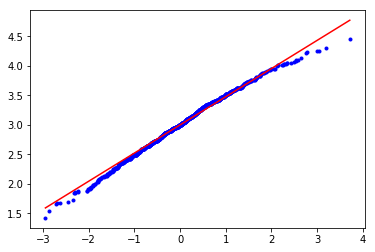

In [28]:
xs = np.array(sorted(xs)) # sort the sample values
zs = np.array(sorted(np.random.normal(loc=0, scale=1.0, size=N))) # generate an equal sized sorted standard normal
pl.plot(zs,xs,'b.')           # plot the data
pl.plot(zs, zs*std + mu,'r-') # plot the expected straight line

# Estimating parameters of a model

So the straight line above is the *expected* behavior assuming the data is actually drawn from a normal distribtion, and it appears to behave pretty much as expected, especially in the middle. However it's sometimes useful to extract the model parameters directly from the data. This process is called "curve fitting" (since its often used to find the curve that corresponds most closely to the data). We'll spend a lot of time on learning how this work over the rest of the course, but since we need to be able to do this now, here's a simple example of a linear fit to illustrate how it's done. Note that the fit parameters $m$ and $b$ also have corresponding uncertainties $dm$ and $db$. We'll be digging into the meaning and relevance of the uncertainties as we acquire more data to work with in later projects.

In [29]:
def fit_linear(x, m, b):
    return m*x+b

par, cov = curve_fit(fit_linear, zs, xs)
m, b = par
dm, db = np.sqrt(np.diag(cov))

print("Slope = {0:.3f} +/- {1:.3f}".format(m, dm))
print("Intercept = {0:.3f} +/- {1:.3f}".format(b,db))

Slope = 0.496 +/- 0.001
Intercept = 2.998 +/- 0.001
